# Combining running and music parameters

In [9]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

logger = logging.getLogger()
logger.setLevel(logging.ERROR)

In [10]:
from mergait.utility import *
data_path = '../data/sample_full_obf/'

df_sessions = load_datadumps('sessions.csv', timestamp_columns=['t_start', 't_end'], base_path=data_path)

df_footpods, df_footpods_sc, df_music, df_phone_activity, df_phone_motion, df_phone_location = load_datadumps(['footpods.csv', 'footpods_sc.csv','music.csv','phone_activity.csv','phone_motion.csv.gz','phone_location.csv'], base_path=data_path)

df_music_features_tracks, df_music_features_sections = load_datadumps(['music_features_tracks.csv','music_features_sections.csv'], timestamp_columns=[], base_path=data_path)

df_sessions

,session_id,user_id,t_start,t_end,duration
0,s1,u0,1970-01-01 00:00:00.000000000,1970-01-01 01:02:26.141195059,3746.141195
1,s0,u0,1970-01-14 00:16:00.758486271,1970-01-14 01:22:31.301756143,3990.543270


In [11]:
from mergait.recipes import *

df_pod_steps, df_pod_symmetry = recipe_footpod_symmetry(df_footpods, df_music, df_phone_activity, df_sessions)

In [12]:
df_pod_steps_sections, df_pod_symmetry_sections = recipe_footpod_symmetry(df_footpods, df_music, df_phone_activity, df_sessions, sections=df_music_features_sections)

In [13]:
df_imu_steps, df_imu_symmetry = recipe_imu_symmetry(df_phone_motion, df_music, df_phone_activity, df_sessions)

In [14]:
df_imu_steps_sections, df_imu_symmetry_sections = recipe_imu_symmetry(df_phone_motion, df_music, df_phone_activity, df_sessions, sections=df_music_features_sections)

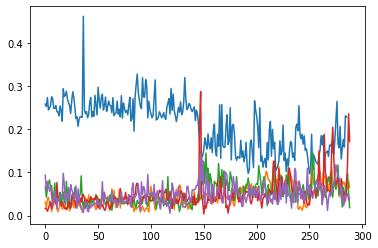

In [26]:
plt.plot(df_imu_symmetry_sections.gsi_median)
plt.plot(df_pod_symmetry_sections.impact_sa_rmse)
plt.plot(df_pod_symmetry_sections.braking_sa_rmse)
plt.plot(df_pod_symmetry_sections.flight_ratio_sa_rmse)
plt.plot(df_pod_symmetry_sections.pronation_sa_rmse)

,pronation_sa_mae,braking_sa_mae,impact_sa_mae,contact_time_sa_mae,flight_ratio_sa_mae,strike_sa_mae,power_sa_mae
pronation_sa_mae,1.000000,0.192611,0.123824,0.025771,0.125047,-0.122173,0.080926
braking_sa_mae,0.192611,1.000000,0.360976,0.152317,0.165154,-0.083000,0.113810
impact_sa_mae,0.123824,0.360976,1.000000,0.315212,0.407130,-0.199751,0.358012
contact_time_sa_mae,0.025771,0.152317,0.315212,1.000000,0.745664,0.051825,0.660602
flight_ratio_sa_mae,0.125047,0.165154,0.407130,0.745664,1.000000,-0.069490,0.583274
strike_sa_mae,-0.122173,-0.083000,-0.199751,0.051825,-0.069490,1.000000,-0.048027
power_sa_mae,0.080926,0.113810,0.358012,0.660602,0.583274,-0.048027,1.000000


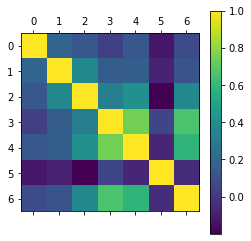

In [50]:
dfc = df_pod_symmetry_sections.filter(regex='_sa_mae|gsi_median')
plt.matshow(dfc.corr())
plt.colorbar()
dfc.corr()